## Dans la premiere partie nous avons obtenu les accuracy suivants: 
1. 0.97 sur le jeu d'entrainement 
2. 0.95 sur le jeu de validation
3. 0.97 sur le jeu de test

# Import

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Conv2DTranspose, Conv1D, Conv1DTranspose,MaxPooling1D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import os

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import shutil

# Décompresser le fichier

In [ ]:
!unrar x -Y "/content/notMNIST_small_valide.rar" "/content/"

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Extracting  /content/notMNIST_small/H/QmVsbENlbnQgU3ViQ2FwIEJUIFN1Yi1DYXB0aW9uLnR0Zg==.png      77%  OK 
Extracting  /content/notMNIST_small/H/QmVsbENlbnRlbm5pYWwtTmFtZUFuZE51bWJlci5vdGY=.png      77%  OK 
Extracting  /content/notMNIST_small/H/QmVsbGFteUV4dHJhQm9sZC5vdGY=.png      77%  OK 
Extracting  /content/notMNIST_small/H/QmVsbGhvcE5GLnR0Zg==.png            77%  OK 
Extracting  /content/notMNIST_small/H/QmVsd2VFRi1Cb2xkLm90Zg==.png        77%  OK 
Extracting  /content/notMNIST_small/H/QmVsd2VFRi1Cb2xkQ29uZGVuc2VkLm90Zg==.png      77%  OK 
Extracting  /content/notMNIST_small/H/QmVsd2VTdGQtTGlnaHRJdGFsaWMub3Rm.png      77%  OK 
Extracting  /content/notMNIST_small/H/QmVsdWNpYW4tRGVtaUJvbGQub3Rm.png      77%  OK 
Extracting  /content/notMNIST_small/H/QmVtYm8gTU9OT1RZUEUgRXhwZXJ0IEJvbGQgT3NGLnR0Zg==.png      77%  OK 
Extracting  

In [ ]:
!mkdir 'train'
!mkdir 'valid'
!mkdir 'test'

# Creation de sous dossier A,B,C...

In [ ]:
for alpha in os.listdir('/content/notMNIST_small') :
  try: 
    os.mkdir('train/'+alpha)
    
  except:
    pass
  try :
    os.mkdir('valid/'+alpha)
  except :
    pass
  try :
    os.mkdir('test/'+alpha)
  except :
    pass

# Division de la dataset en 75% pour l'entrainement, 10% pour la validation  et 15% pour le test d'une façon équilibrée



In [ ]:
for alpha in os.listdir('/content/notMNIST_small') : 
  alpha_path = os.path.join('/content/notMNIST_small',alpha)
  nb_images = len(os.listdir(alpha_path))
  

  #train
  list_images = os.listdir(alpha_path)
  for i in range(0,int(0.75*len(list_images))):
    src_path = os.path.join(alpha_path,list_images[i])
    dist_path = os.path.join('train/'+alpha,list_images[i])
    shutil.move(src_path, dist_path)
  #valid
  for i in range(int(0.75*len(list_images)),int(0.85*len(list_images))):
    src_path = os.path.join(alpha_path,list_images[i])
    dist_path = os.path.join('valid/'+alpha,list_images[i])
    shutil.move(src_path, dist_path)

  #test
  for i in range(int(0.85*len(list_images)) , len(list_images)):
    src_path = os.path.join(alpha_path,list_images[i])
    dist_path = os.path.join('test/'+alpha,list_images[i])
    shutil.move(src_path, dist_path)

# calcule de nombre d'images dans les jeux d'entrainement, validation et test

In [ ]:
nb_train_samples = 0 
nb_validation_samples = 0
nb_test_samples = 0

for alpha in os.listdir('/content/train') :
  alpha_path = os.path.join('/content/train',alpha)
  #print(len(os.listdir(alpha_path)))
  nb_train_samples += len(os.listdir(alpha_path))

for alpha in os.listdir('/content/valid') :
  alpha_path = os.path.join('/content/valid',alpha)
  nb_validation_samples += len(os.listdir(alpha_path))

for alpha in os.listdir('/content/test') :
  alpha_path = os.path.join('/content/test',alpha)
  nb_test_samples += len(os.listdir(alpha_path))


In [ ]:
nb_train_samples, nb_validation_samples, nb_test_samples

(14040, 1874, 2810)

## Initialisation des parametres

In [ ]:
img_width, img_height = 28, 28

train_data_dir = 'train'
validation_data_dir = 'valid'
test_data_dir = 'test'

epochs = 100
batch_size = 48

if K.image_data_format() == 'channels_first':
    input_shape = (img_width, img_height,1)
else:
    input_shape = (img_width, img_height,1)

# Creation de modèle

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2DTranspose(32, (3, 3)))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_transpose (Conv2DTra  (None, 15, 15, 32)       9248      
 nspose)                                                         
                                                                 
 activation_1 (Activation)   (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        1

## 1- Datagenerator pour le jeu d'entrainement avec data augmentation

*   L'augmentation avec le datagenerator prendre moins d'espace mémoire sachant que on a pas sauvgarder les images
* cette méthode nous a aidé pour avoir un bon accuracy où la géneration des nouvelles images se fair à l'étape d'entrainement, et aussi assure que le modèle recoit une variation d'images.

## 2- Nous avons utilisé zoom_range, height_shift_range... avec des petites valeurs pour que on perdre pas les parties des images qui sont utiles 

## 3- Nous avons pensé à lire les imgaes en fomat grayscale sachant que y a pas de couleurs

In [ ]:
#
train_datagen = ImageDataGenerator(
                          rescale=1. / 255,
                          brightness_range=(0.2,0.7), 
                          #zca_whitening=True
                          rotation_range= 20,
                          width_shift_range = 0.1,
                          height_shift_range=0.1,
                          zoom_range= 0.05)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    color_mode = "grayscale",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 14040 images belonging to 10 classes.


# Validation generator

In [ ]:
valid_datagen = ImageDataGenerator(rescale=1. / 255)
validation_generator = valid_datagen.flow_from_directory(
    validation_data_dir,
    color_mode = "grayscale",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 1874 images belonging to 10 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    color_mode = "grayscale",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 2810 images belonging to 10 classes.


In [ ]:
train_generator[0][0].shape

(48, 28, 28, 1)

# Entrainement de modèle




In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

<ipython-input-14-50dac1443f25>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
292/292 [==============================] - 37s 124ms/step - loss: 0.8783 - accuracy: 0.7316 - val_loss: 0.5089 - val_accuracy: 0.8884
Epoch 2/100
292/292 [==============================] - 34s 114ms/step - loss: 0.4665 - accuracy: 0.8623 - val_loss: 0.3706 - val_accuracy: 0.9001
Epoch 3/100
292/292 [==============================] - 32s 111ms/step - loss: 0.3784 - accuracy: 0.8839 - val_loss: 0.3252 - val_accuracy: 0.9188
Epoch 4/100
292/292 [==============================] - 34s 116ms/step - loss: 0.3404 - accuracy: 0.8984 - val_loss: 0.3119 - val_accuracy: 0.9183
Epoch 5/100
292/292 [==============================] - 33s 112ms/step - loss: 0.3100 - accuracy: 0.9065 - val_loss: 0.2677 - val_accuracy: 0.9241
Epoch 6/100
292/292 [==============================] - 33s 114ms/step - loss: 0.2843 - accuracy: 0.9153 - val_loss: 0.2643 - val_accuracy: 0.9295
Epoch 7/100
292/292 [==============================] - 35s 119ms/step - loss: 0.2743 - accuracy: 0.9167 - val_loss: 0.2461 -

# Accuracy

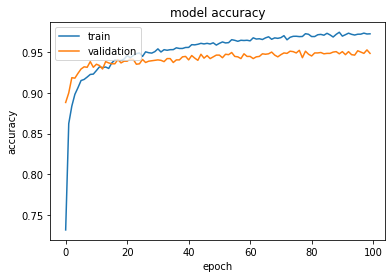

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Evaluation de modèle sur le jeu de test

In [ ]:
model.evaluate_generator(test_generator)

<ipython-input-18-faa0e9406f88>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator)


[0.23240810632705688, 0.9594305753707886]

# Résultats finaux
1. Accuracy d'entrainement: 0.97
2. Accuracy de validation : 0.95
3. Accuracy de test : 0.97